In [1]:
!pip install librosa

In [2]:
import librosa,librosa.display
import matplotlib.pyplot as plt


In [9]:
import glob

# Get all files with a .wav extension
files = glob.glob("fold*.wav")

# Select the first 5 files
selected_files = files[:5]

print("Selected files:", selected_files)

Selected files: ['fold3.wav', 'fold1.wav', 'fold2.wav', 'fold5.wav', 'fold4.wav']


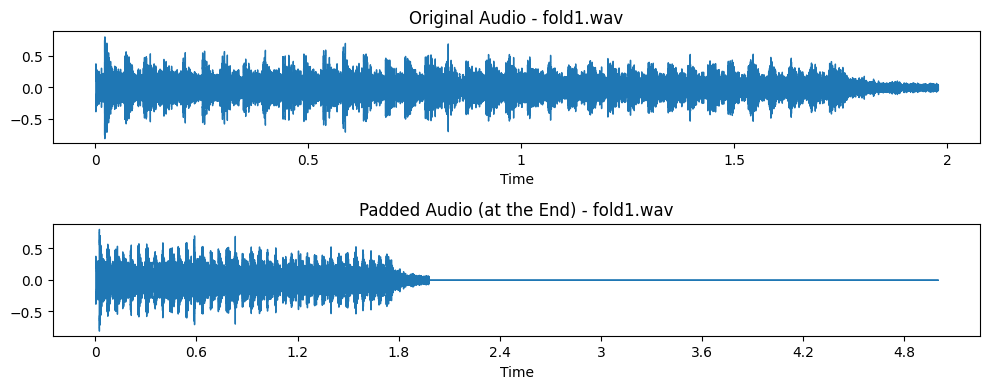

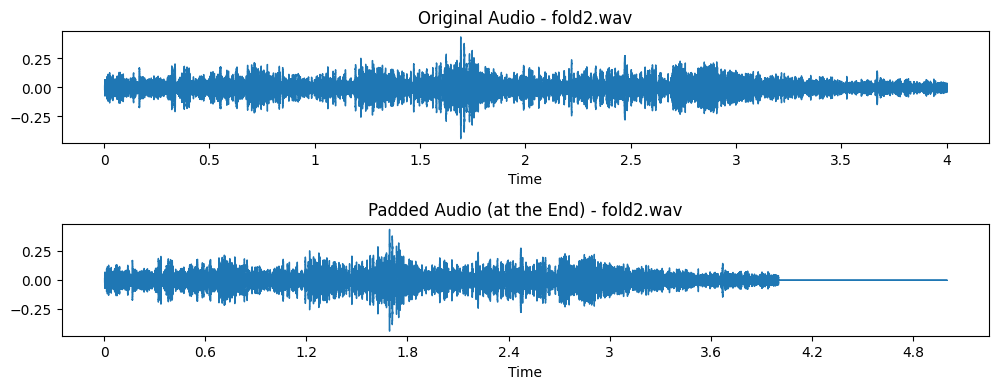

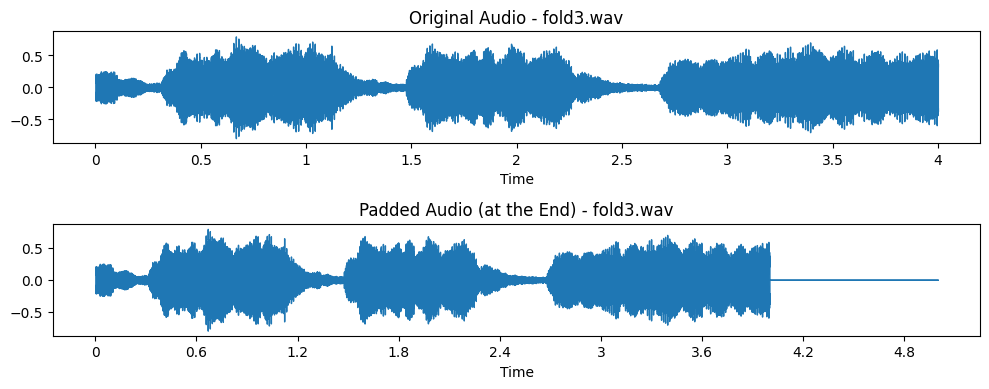

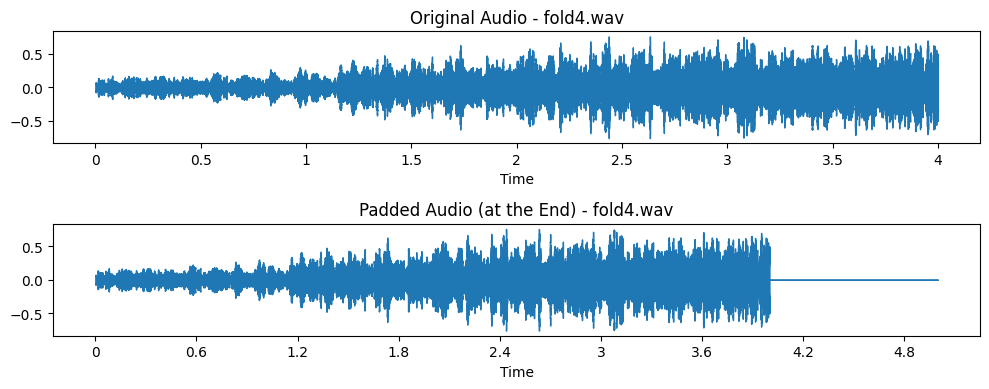

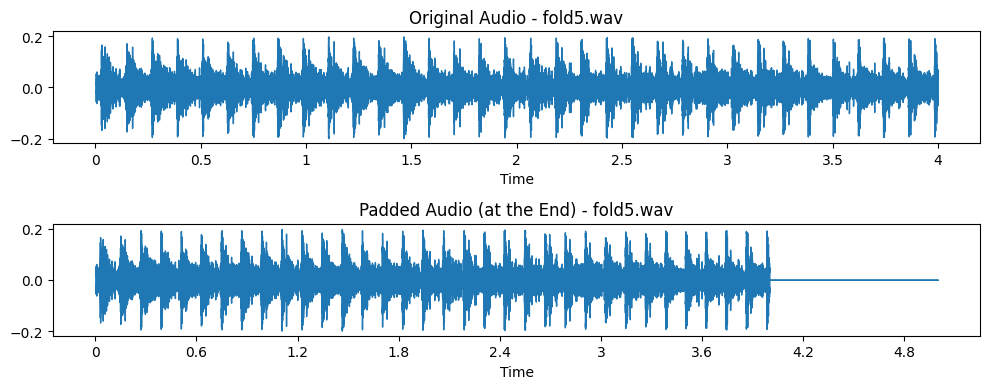

In [19]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# List of audio files
audio_files = ['fold1.wav', 'fold2.wav', 'fold3.wav', 'fold4.wav', 'fold5.wav']

# Function to pad the audio signal at the end
def zero_padding(audio_signal, target_length):
    padding_length = target_length - len(audio_signal)
    if padding_length > 0:
        padded_audio = np.pad(audio_signal, (0, padding_length), mode='constant')
    else:
        padded_audio = audio_signal[:target_length]  # If the signal is already long enough
    return padded_audio

# Define the target length (e.g., 5 seconds worth of samples at 22050 Hz sample rate)
target_length = 22050 * 5  # Target length for 5 seconds

# Loop through the files
for audio_file in audio_files:
    # Load the audio file
    audio_data, sr = librosa.load(audio_file)

    # Apply zero padding
    padded_audio = zero_padding(audio_data, target_length)

    # Plot the original and padded signals for each file
    plt.figure(figsize=(10, 4))

    # Plot original audio
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(f'Original Audio - {audio_file}')

    # Plot padded audio
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(padded_audio, sr=sr)
    plt.title(f'Padded Audio (at the End) - {audio_file}')

    plt.tight_layout()
    plt.show()


Saved padded audio to: /content/padded_audio/padded_fold1.wav


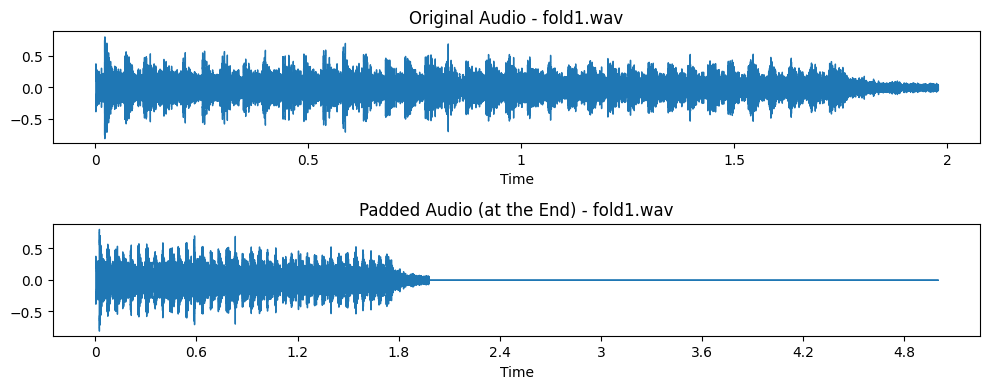

Saved padded audio to: /content/padded_audio/padded_fold2.wav


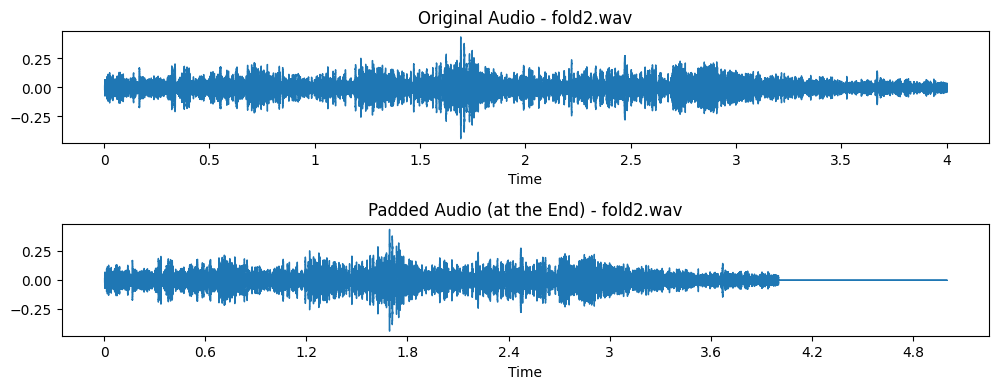

Saved padded audio to: /content/padded_audio/padded_fold3.wav


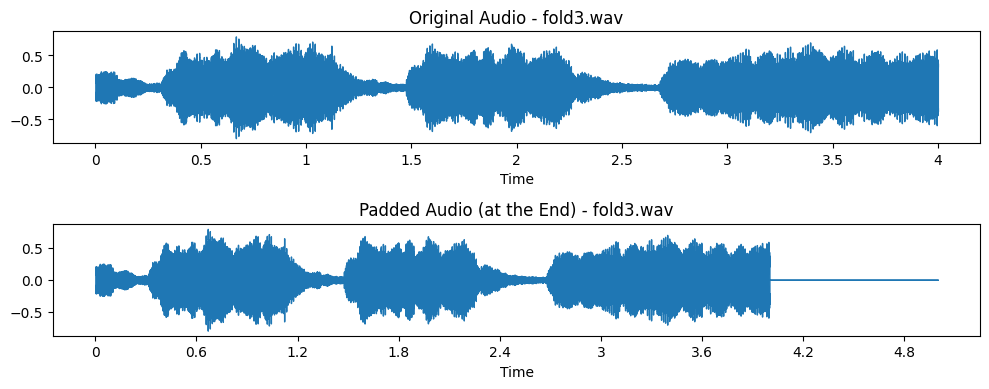

Saved padded audio to: /content/padded_audio/padded_fold4.wav


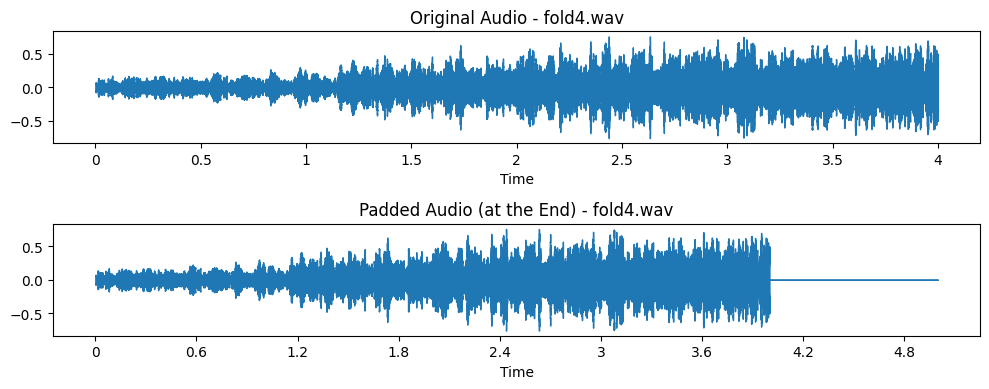

Saved padded audio to: /content/padded_audio/padded_fold5.wav


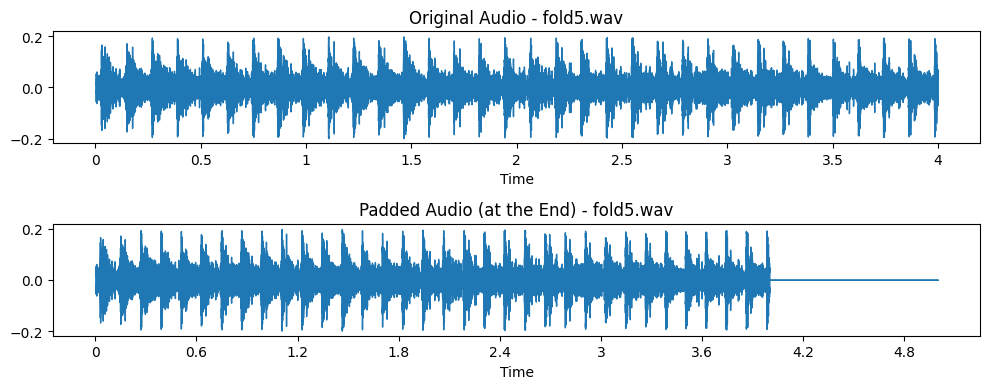

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os
from google.colab import files

# Create a directory for padded files in Colab if it doesn't exist
if not os.path.exists('/content/padded_audio'):
    os.makedirs('/content/padded_audio')

# List of audio files (make sure they are uploaded in Colab)
audio_files = ['fold1.wav', 'fold2.wav', 'fold3.wav', 'fold4.wav', 'fold5.wav']

# Function to pad the audio signal at the end
def zero_padding(audio_signal, target_length):
    padding_length = target_length - len(audio_signal)
    if padding_length > 0:
        padded_audio = np.pad(audio_signal, (0, padding_length), mode='constant')
    else:
        padded_audio = audio_signal[:target_length]  # If the signal is already long enough
    return padded_audio

# Define the target length (e.g., 5 seconds worth of samples at 22050 Hz sample rate)
target_length = 22050 * 5  # Target length for 5 seconds

# Loop through the files
for audio_file in audio_files:
    # Load the audio file
    audio_data, sr = librosa.load(audio_file)

    # Apply zero padding
    padded_audio = zero_padding(audio_data, target_length)

    # Save the padded audio to the padded_audio directory in Colab
    padded_file = os.path.join('/content/padded_audio', f"padded_{audio_file}")
    sf.write(padded_file, padded_audio, sr)

    print(f"Saved padded audio to: {padded_file}")

    # Plot the original and padded signals for each file
    plt.figure(figsize=(10, 4))

    # Plot original audio
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(f'Original Audio - {audio_file}')

    # Plot padded audio
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(padded_audio, sr=sr)
    plt.title(f'Padded Audio (at the End) - {audio_file}')

    plt.tight_layout()
    plt.show()

# To download files after saving them in Colab
# You can use the following to download a specific file or all files
for audio_file in audio_files:
    padded_file = os.path.join('/content/padded_audio', f"padded_{audio_file}")
    files.download(padded_file)  # This will trigger the download


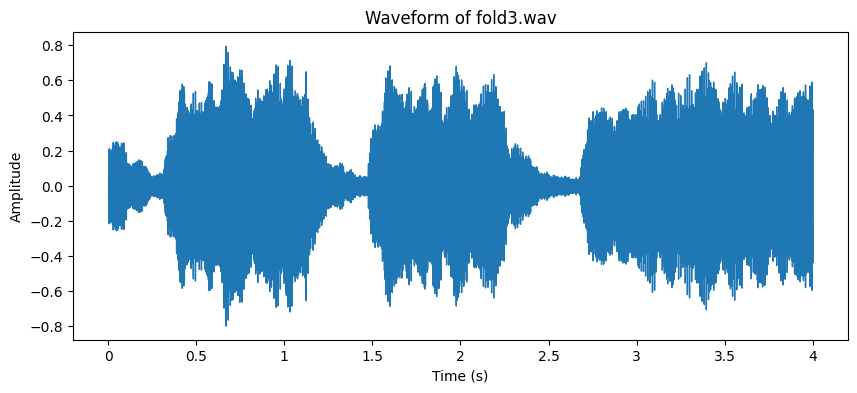

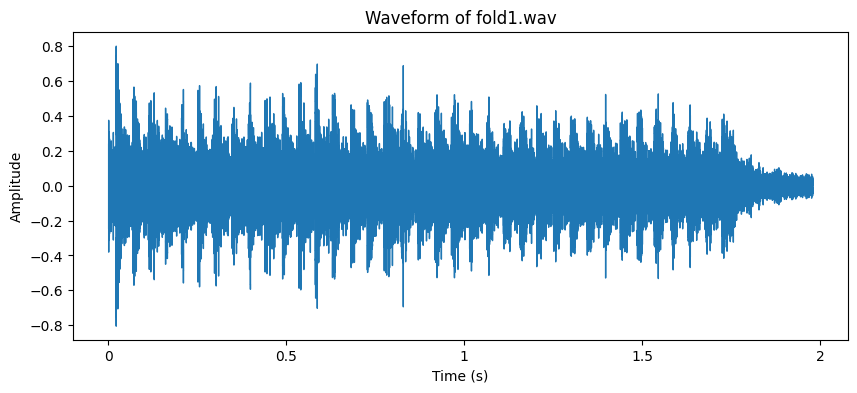

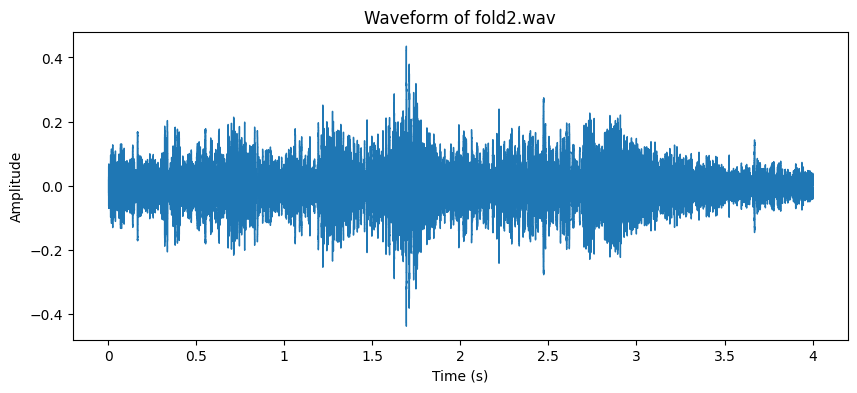

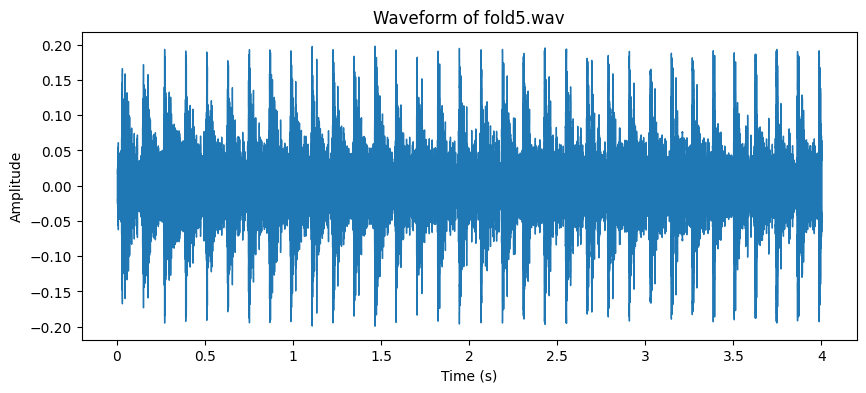

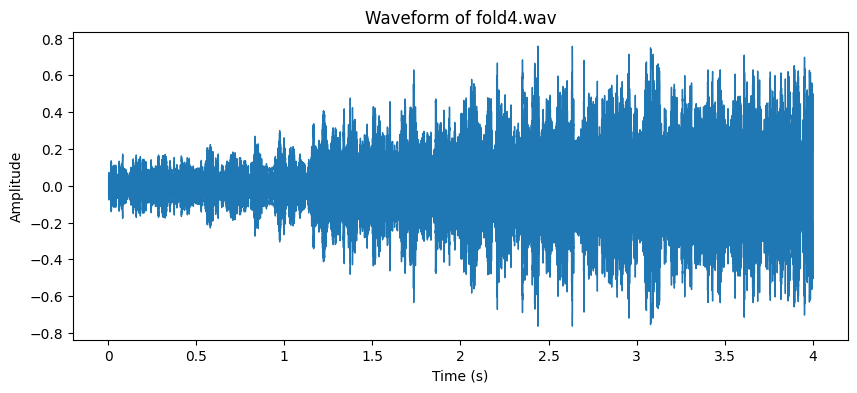

In [20]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob("fold*.wav")[:5]

# Plot the waveform for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Display the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(signal, sr=sr)
    plt.title(f"Waveform of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()


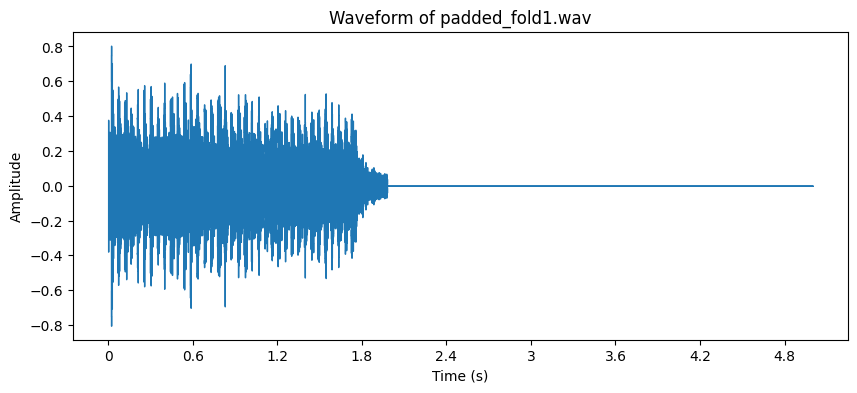

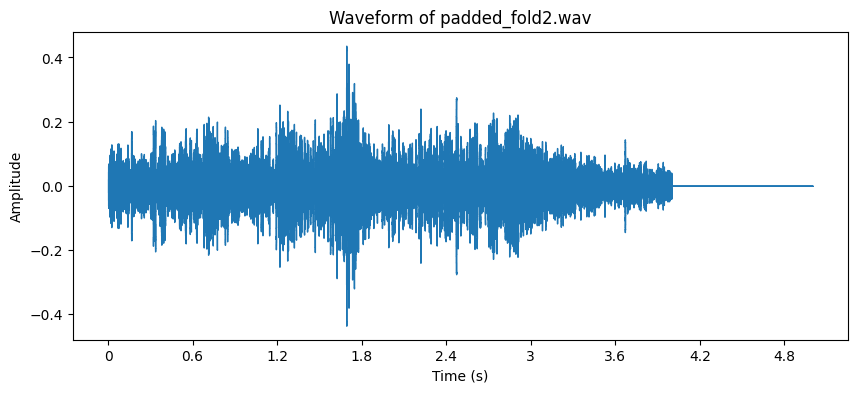

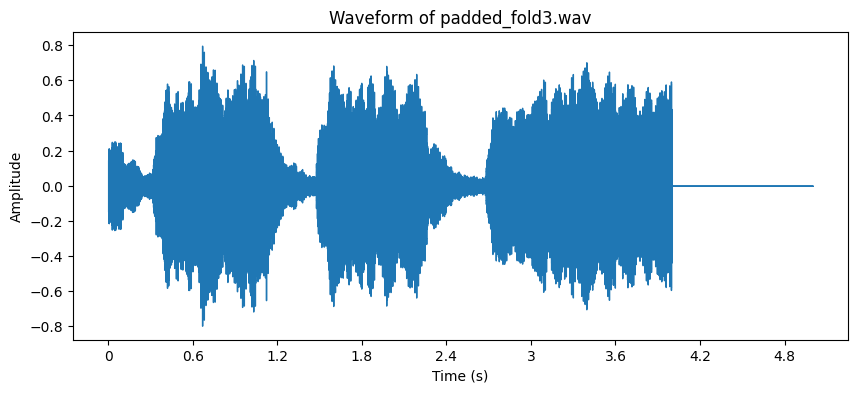

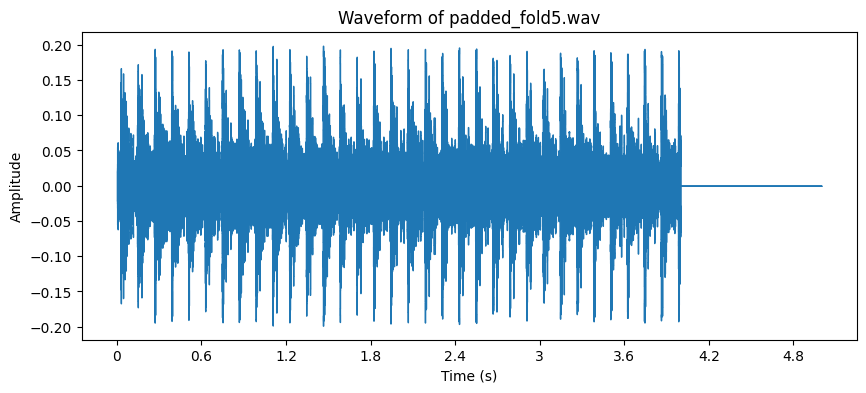

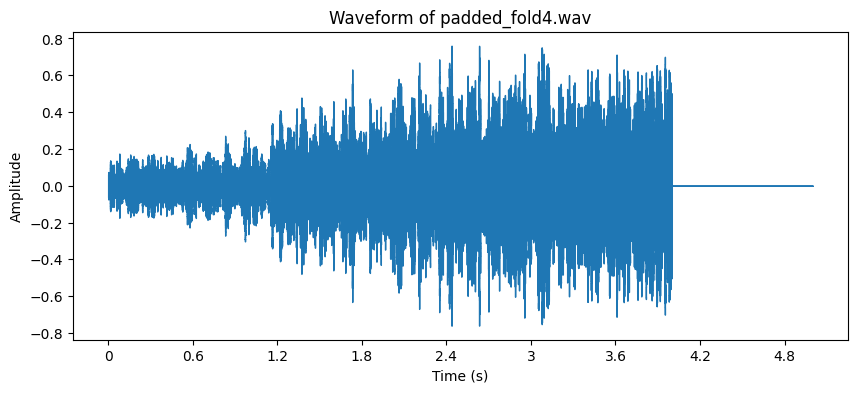

In [25]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob("padded*.wav")[:5]

# Plot the waveform for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Display the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(signal, sr=sr)
    plt.title(f"Waveform of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

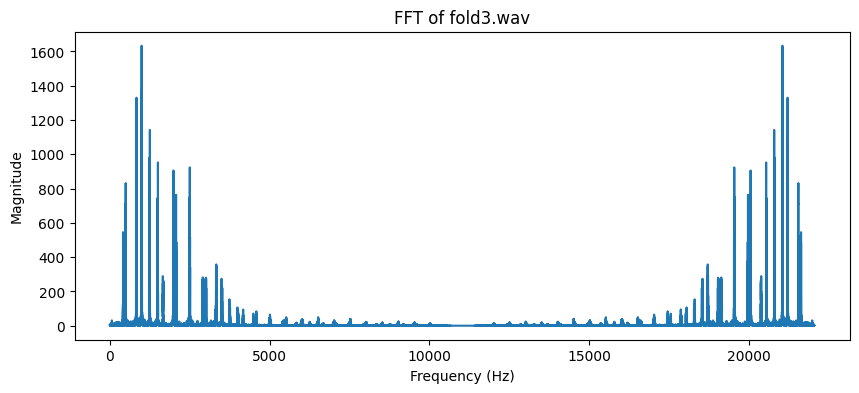

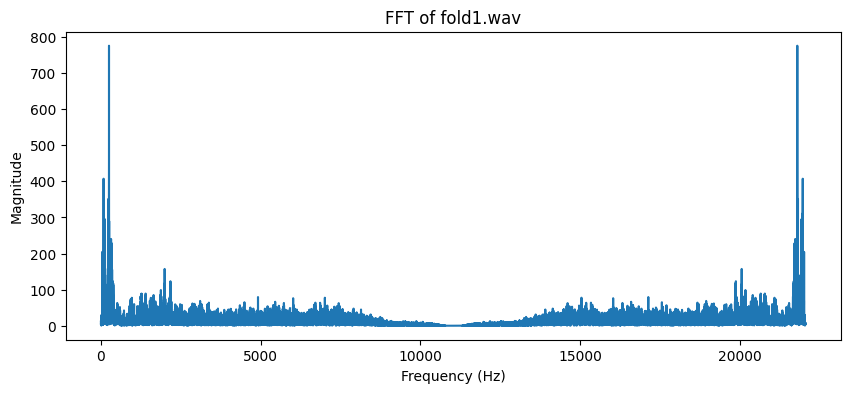

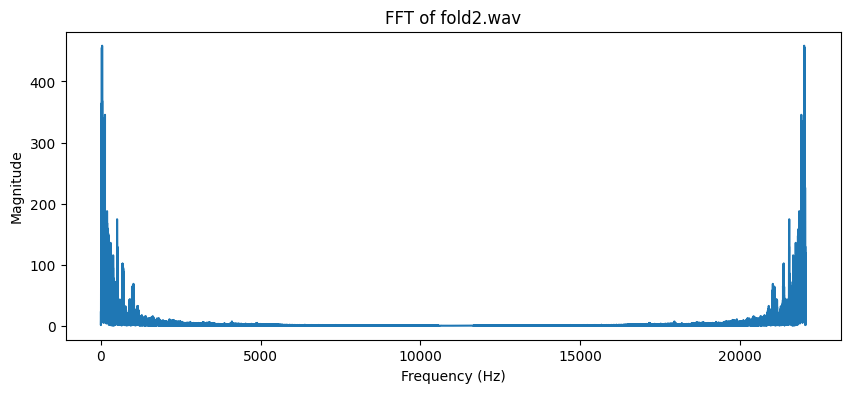

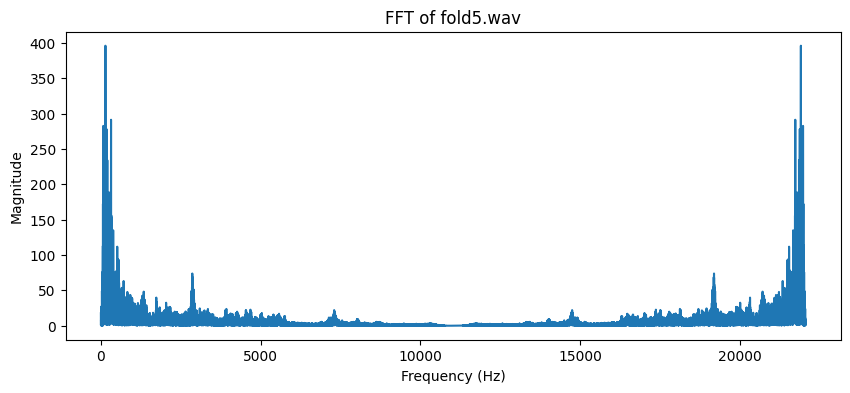

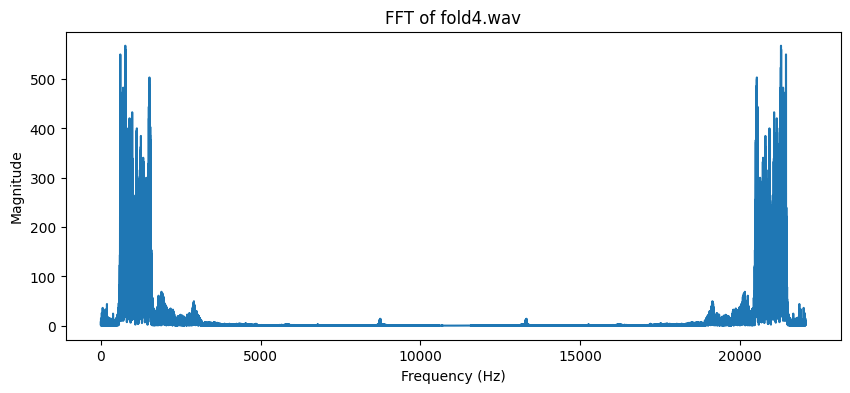

In [21]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob("fold*.wav")[:5]

# Plot the FFT for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform FFT
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    # Display the FFT plot
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, magnitude)
    plt.title(f"FFT of {file}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()


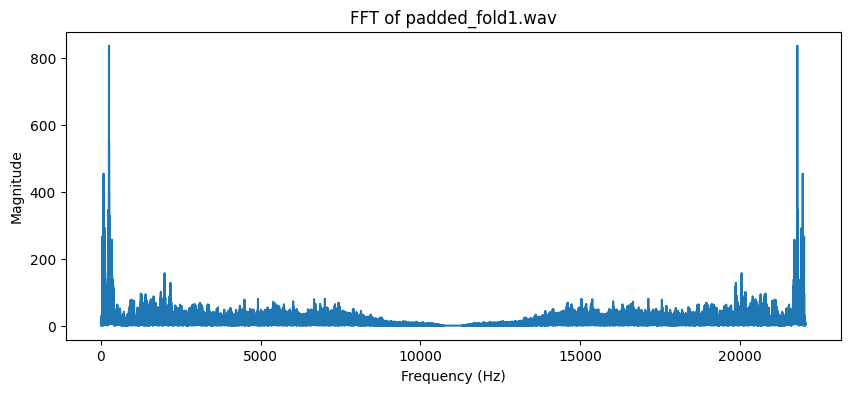

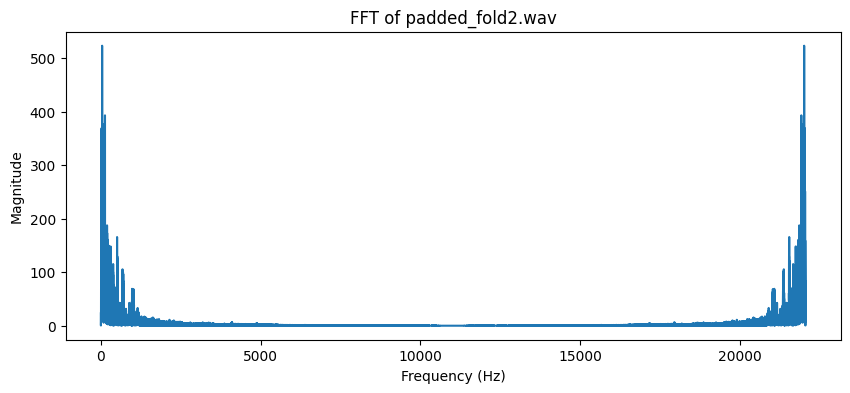

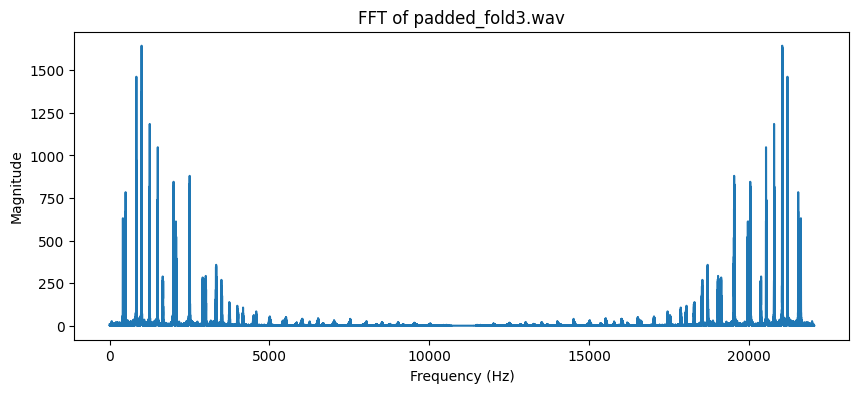

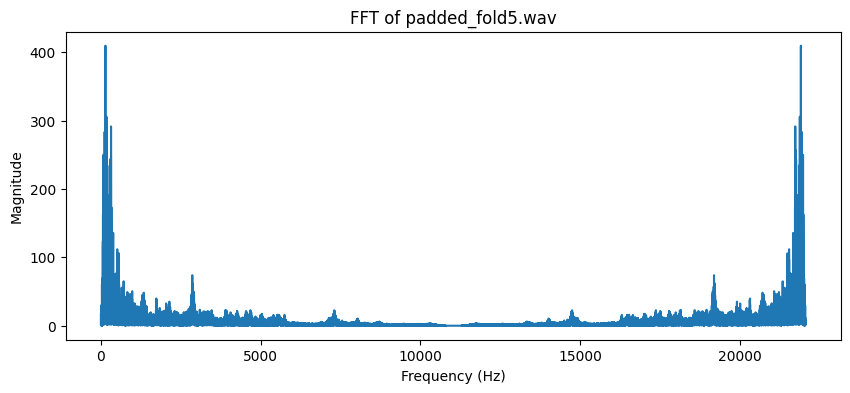

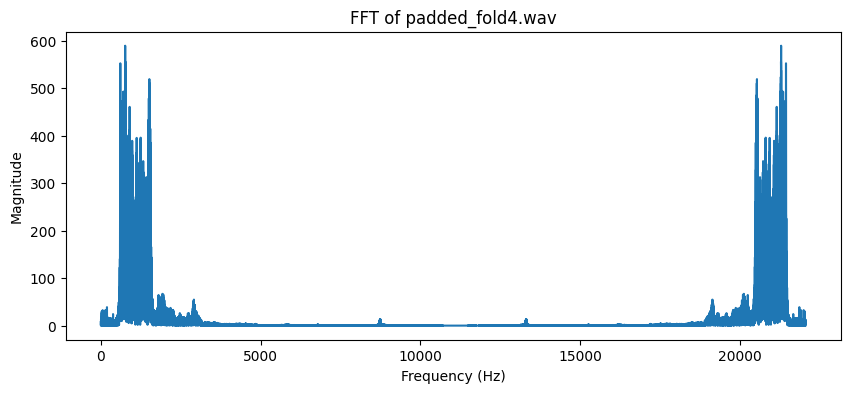

In [26]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob("padded*.wav")[:5]

# Plot the FFT for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform FFT
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    # Display the FFT plot
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, magnitude)
    plt.title(f"FFT of {file}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

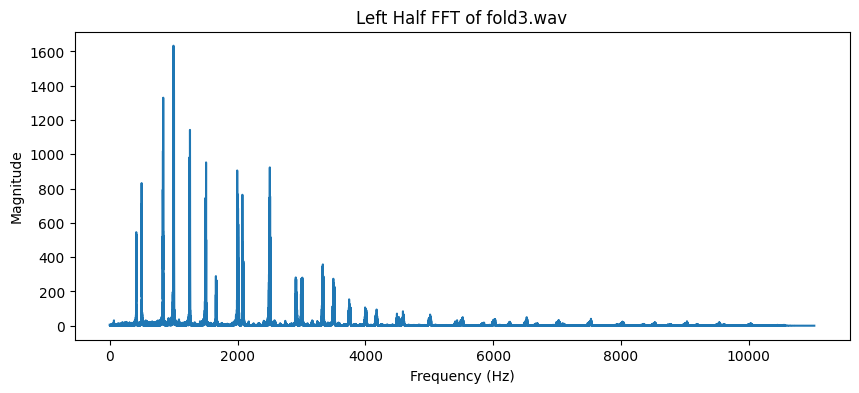

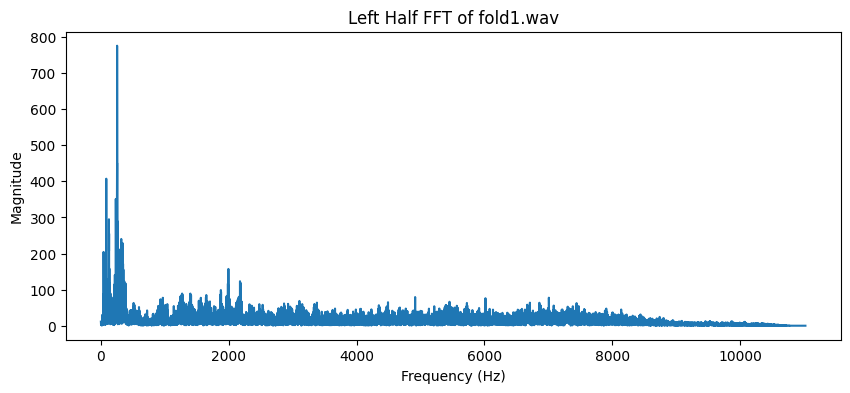

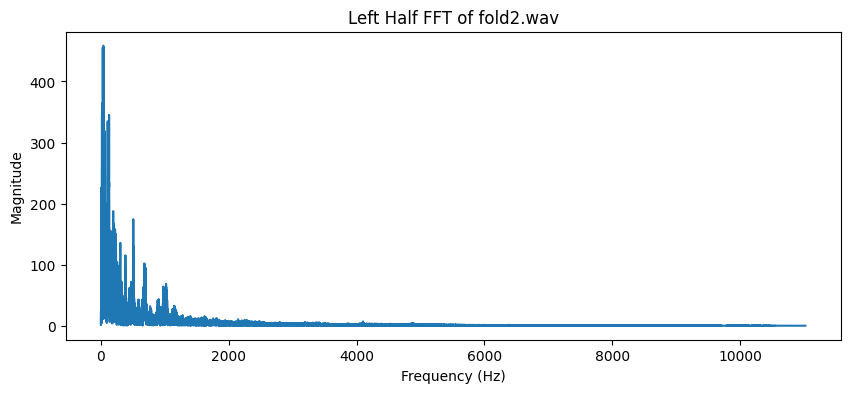

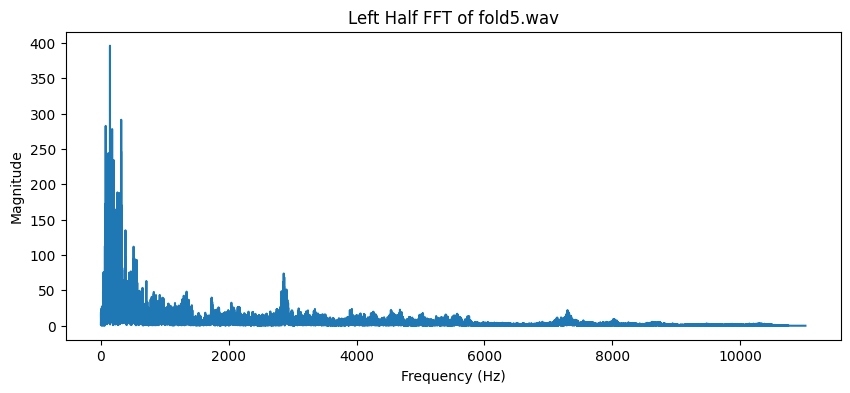

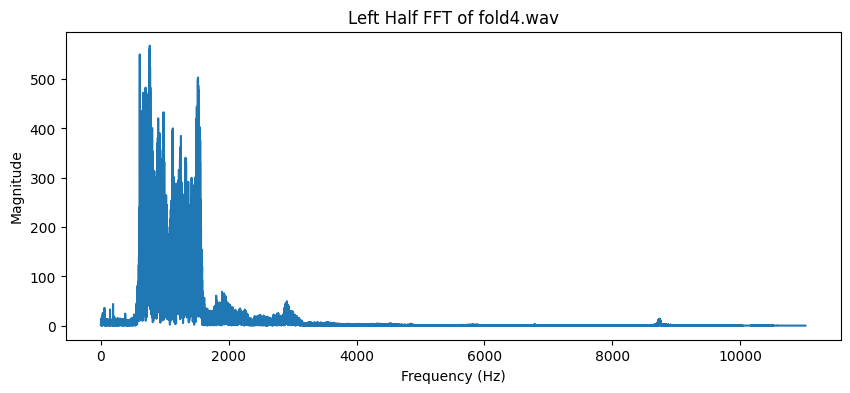

In [22]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob("fold*.wav")[:5]

# Plot the left half of the FFT for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform FFT
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    # Only take the left half of the spectrum (positive frequencies)
    left_frequency = frequency[:len(frequency) // 2]
    left_magnitude = magnitude[:len(magnitude) // 2]

    # Display the plot for the left half of the FFT
    plt.figure(figsize=(10, 4))
    plt.plot(left_frequency, left_magnitude)
    plt.title(f"Left Half FFT of {file}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()


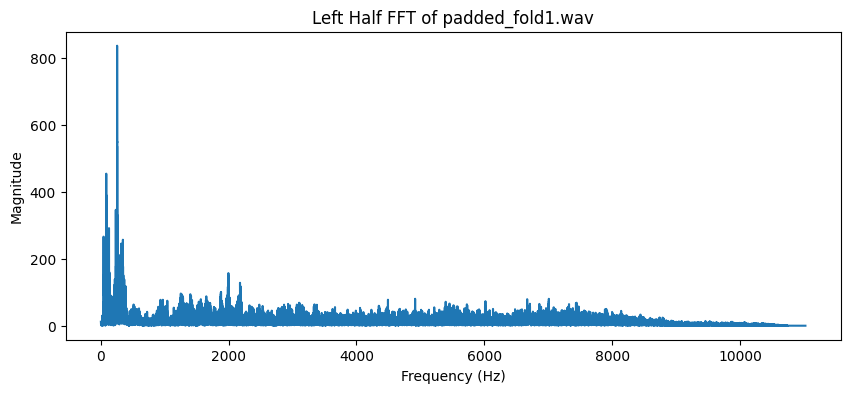

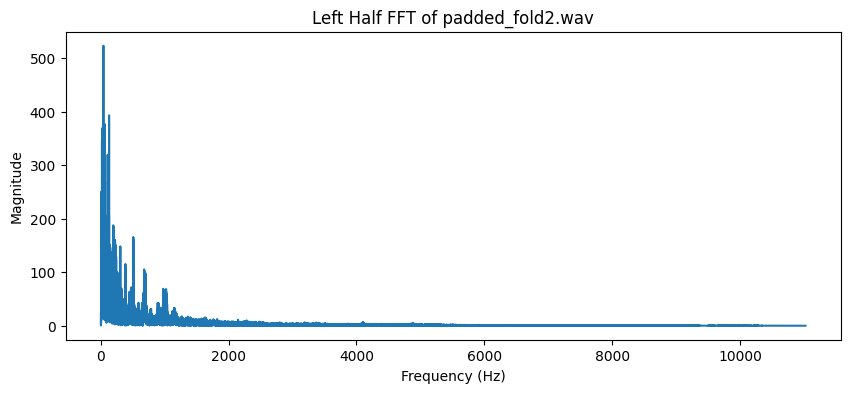

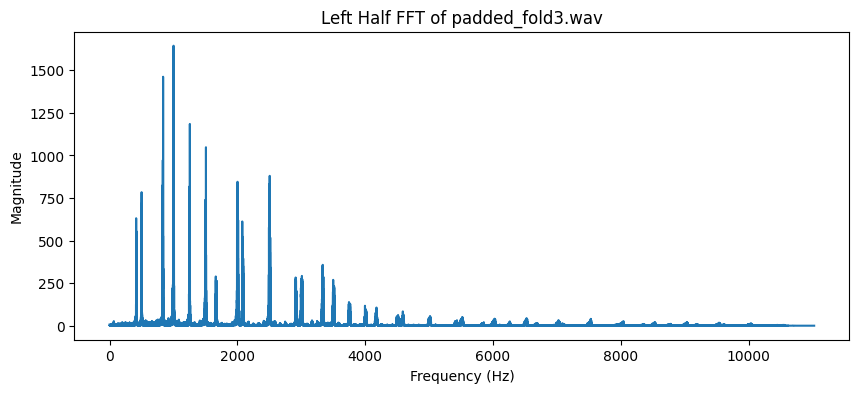

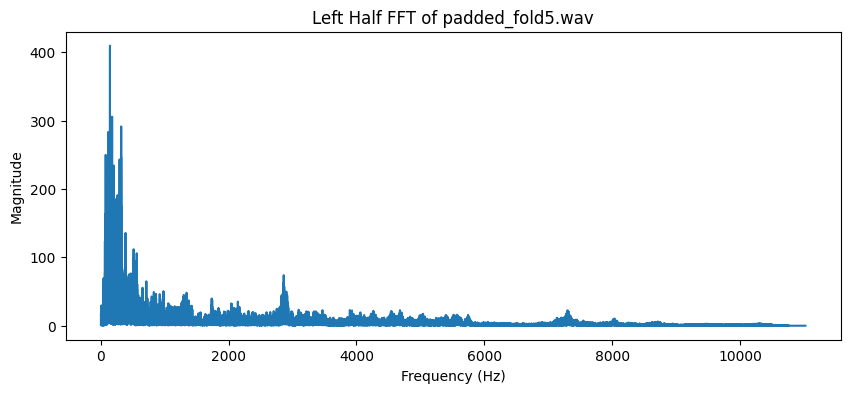

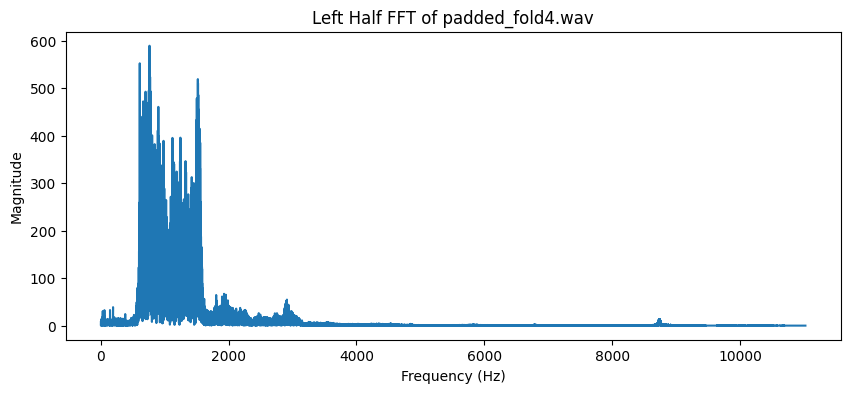

In [27]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob("padded*.wav")[:5]

# Plot the left half of the FFT for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform FFT
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    # Only take the left half of the spectrum (positive frequencies)
    left_frequency = frequency[:len(frequency) // 2]
    left_magnitude = magnitude[:len(magnitude) // 2]

    # Display the plot for the left half of the FFT
    plt.figure(figsize=(10, 4))
    plt.plot(left_frequency, left_magnitude)
    plt.title(f"Left Half FFT of {file}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()


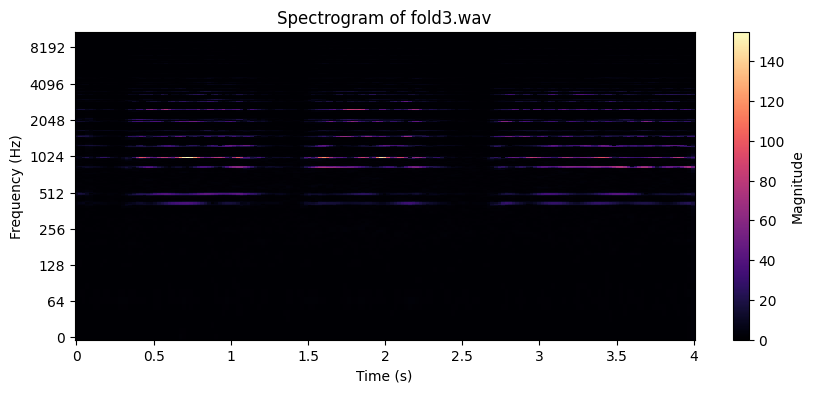

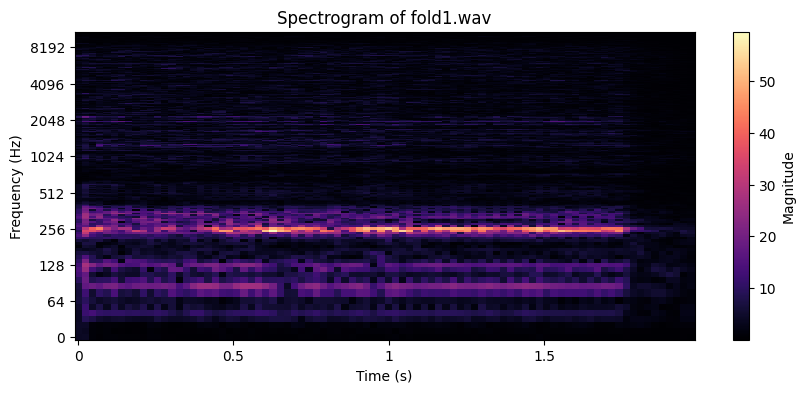

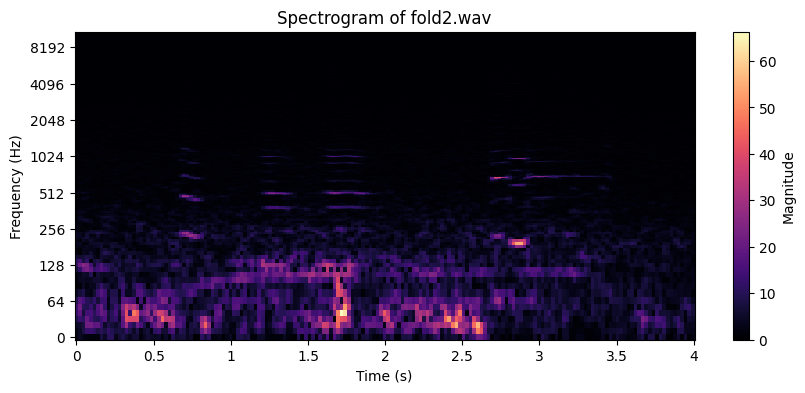

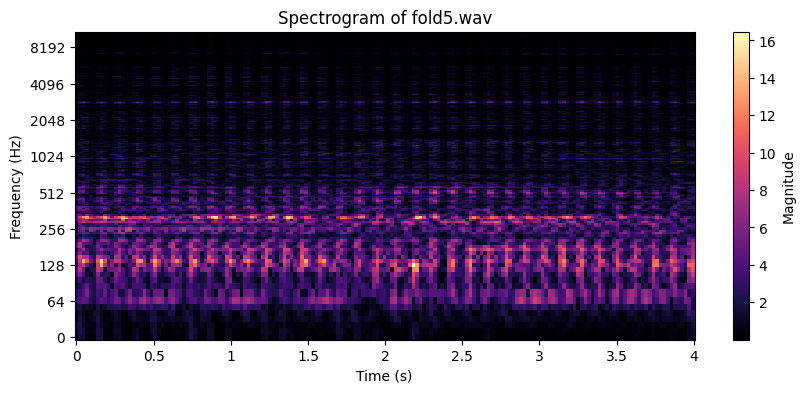

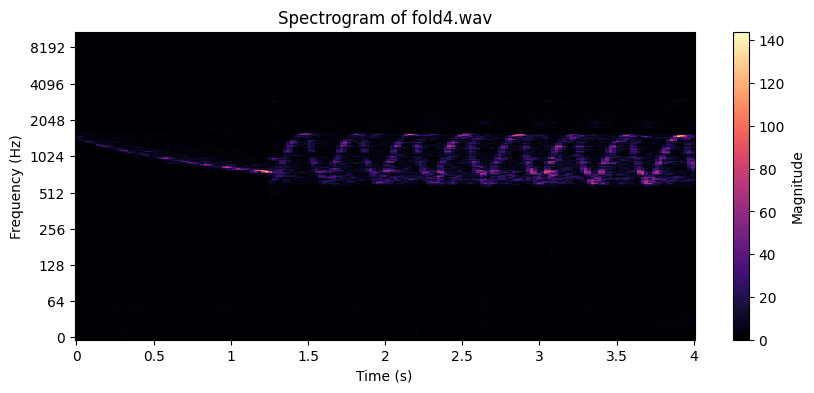

In [13]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob("fold*.wav")[:5]

# Parameters for STFT
n_fft = 2048  # Number of samples in each FFT window
hop_length = 512  # Number of samples between successive frames

# Plot the spectrogram for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform STFT
    stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)  # Take the magnitude to get the power spectrogram

    # Display the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
    plt.title(f"Spectrogram of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Magnitude")
    plt.show()




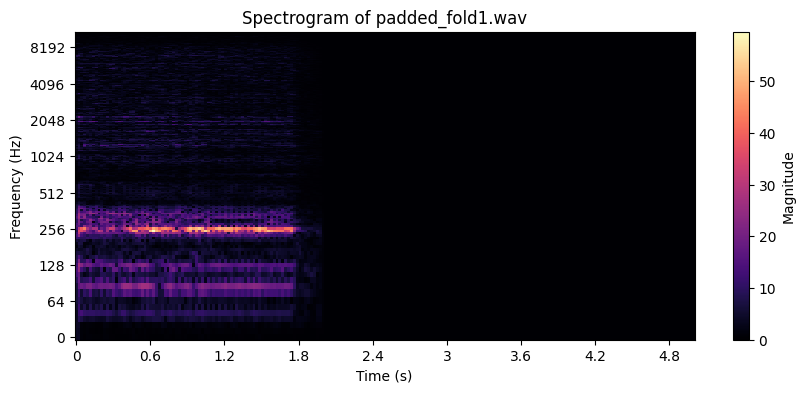

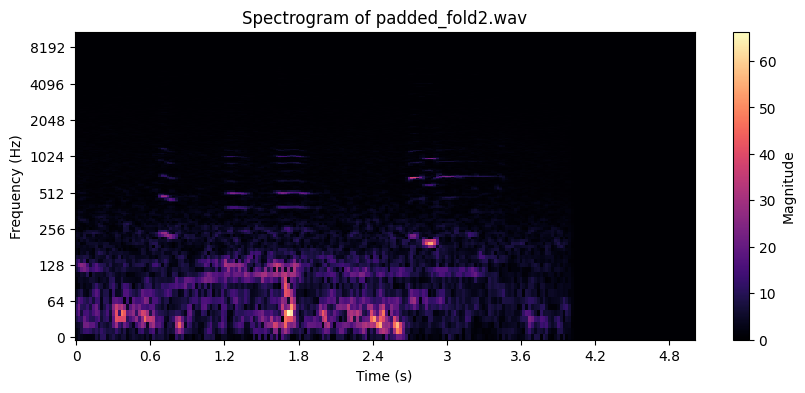

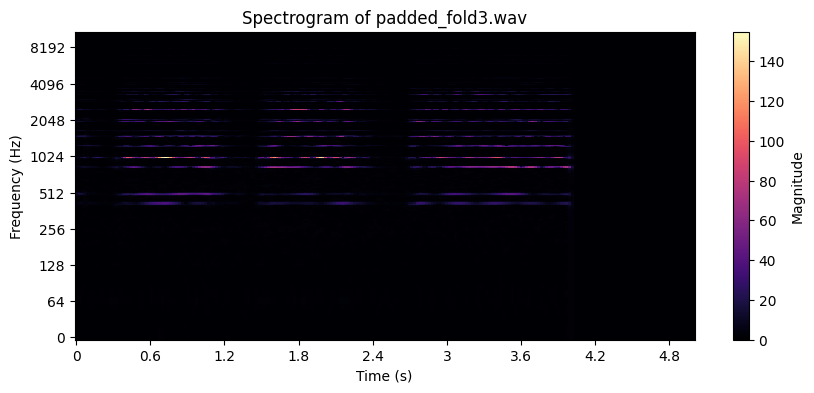

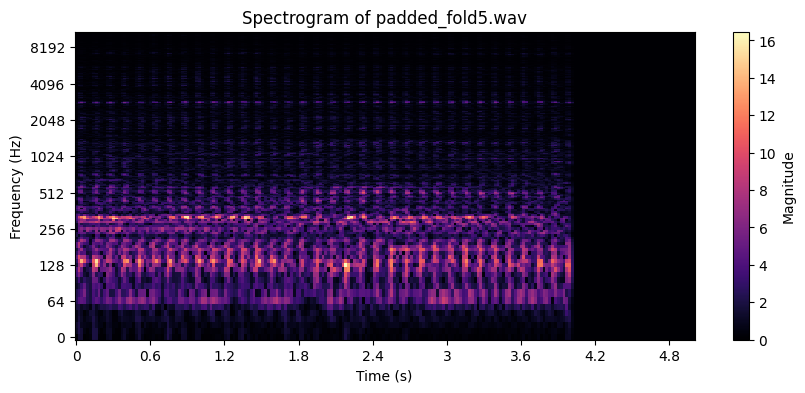

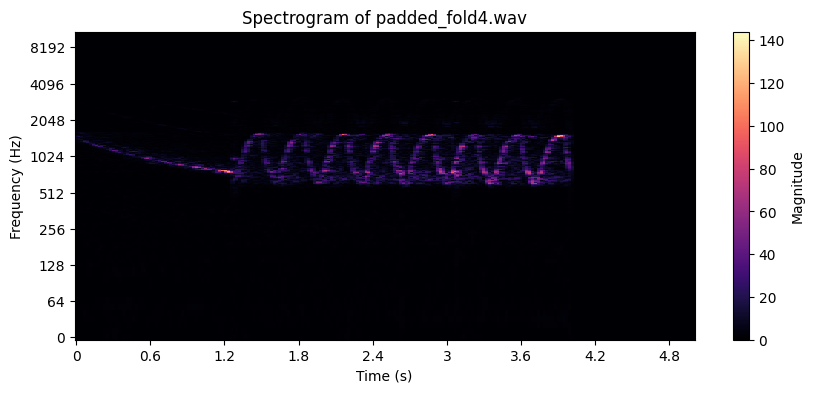

In [28]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob("padded*.wav")[:5]

# Parameters for STFT
n_fft = 2048  # Number of samples in each FFT window
hop_length = 512  # Number of samples between successive frames

# Plot the spectrogram for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform STFT
    stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)  # Take the magnitude to get the power spectrogram

    # Display the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
    plt.title(f"Spectrogram of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Magnitude")
    plt.show()

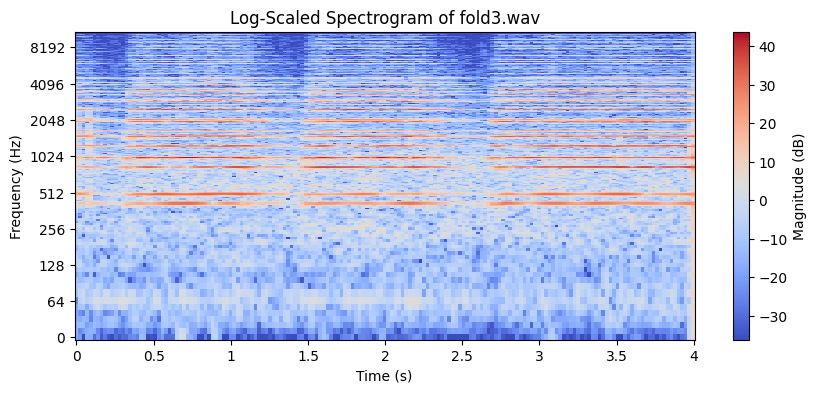

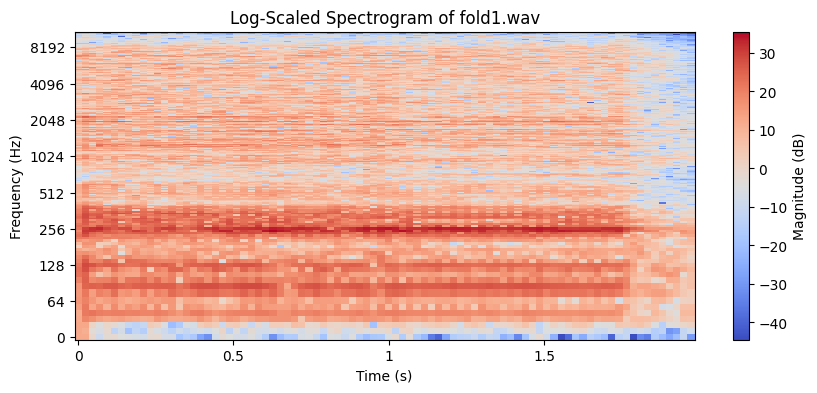

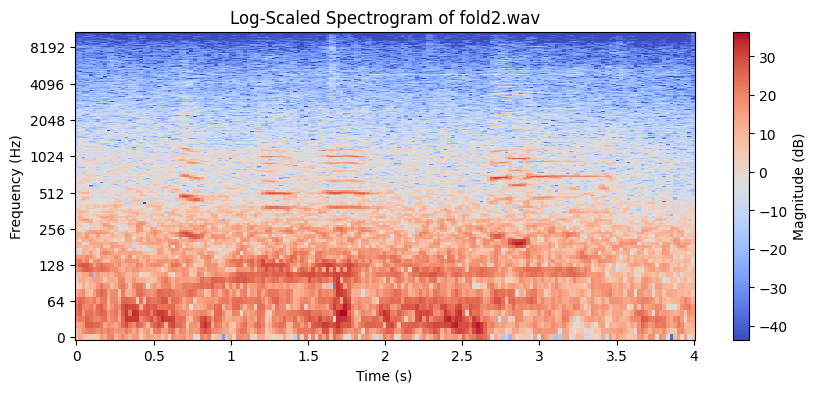

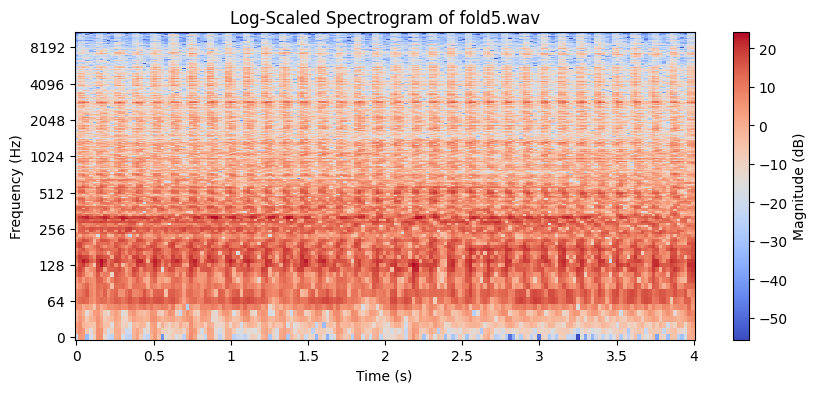

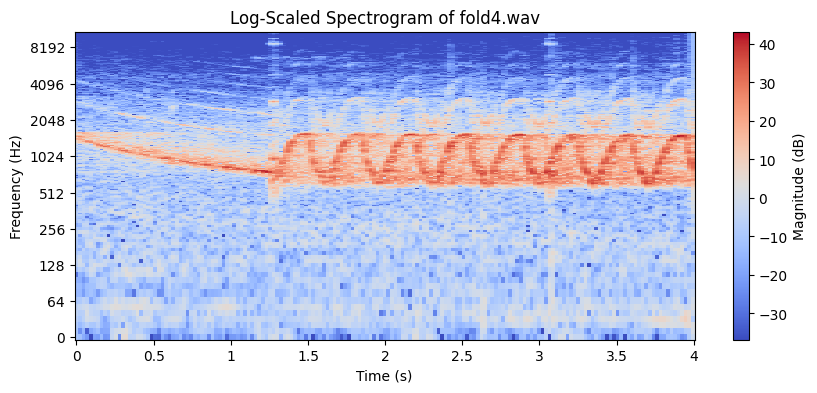

In [14]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob("fold*.wav")[:5]

# Parameters for STFT
n_fft = 2048  # Number of samples in each FFT window
hop_length = 512  # Number of samples between successive frames

# Plot the log spectrogram for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform STFT and convert to magnitude
    stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)

    # Convert the magnitude spectrogram to decibel (dB) scale
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    # Display the log spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
    plt.title(f"Log-Scaled Spectrogram of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Magnitude (dB)")
    plt.show()


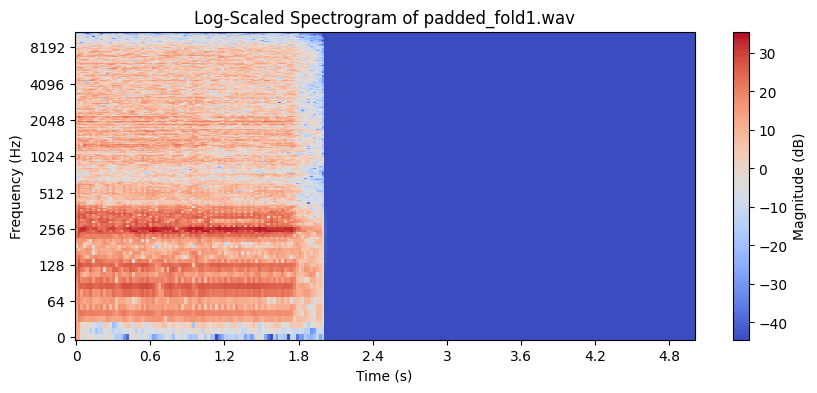

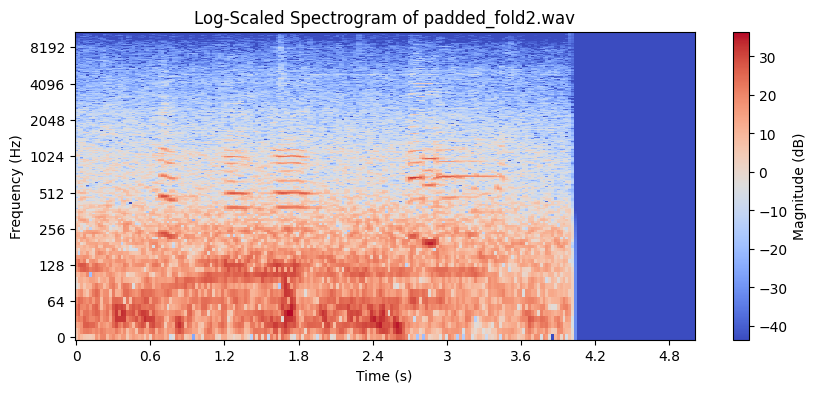

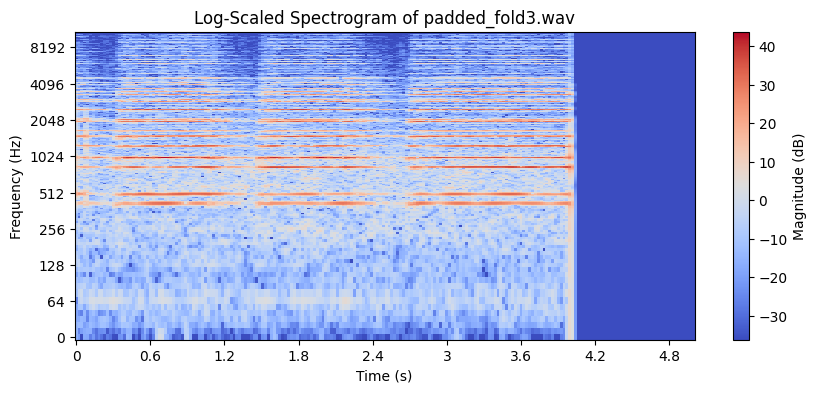

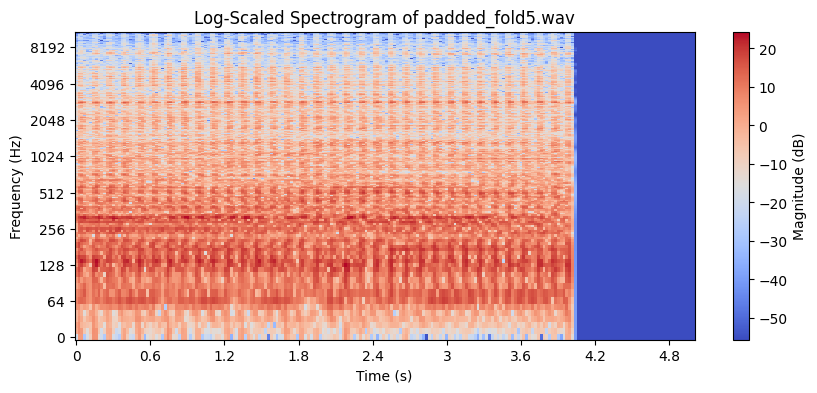

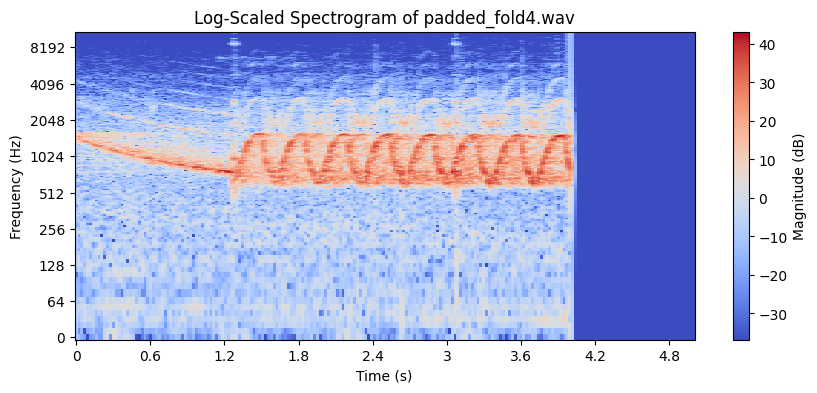

In [29]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob("padded*.wav")[:5]

# Parameters for STFT
n_fft = 2048  # Number of samples in each FFT window
hop_length = 512  # Number of samples between successive frames

# Plot the log spectrogram for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform STFT and convert to magnitude
    stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)

    # Convert the magnitude spectrogram to decibel (dB) scale
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    # Display the log spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
    plt.title(f"Log-Scaled Spectrogram of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Magnitude (dB)")
    plt.show()


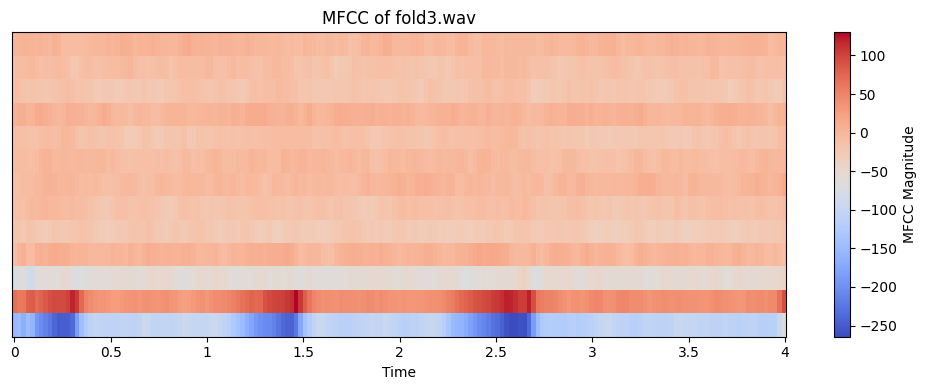

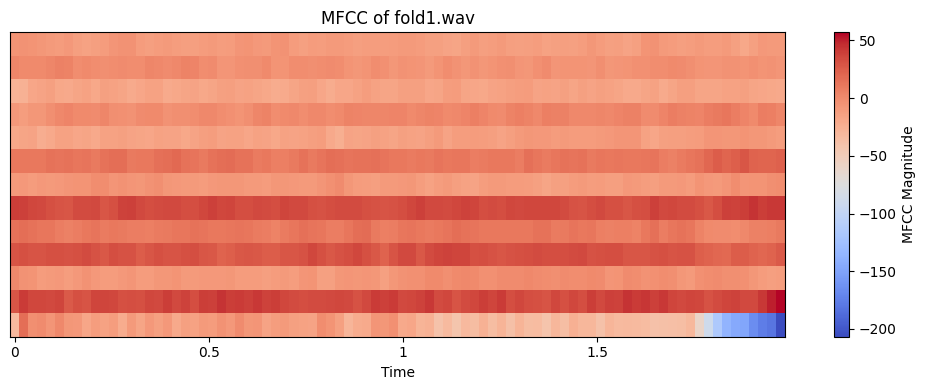

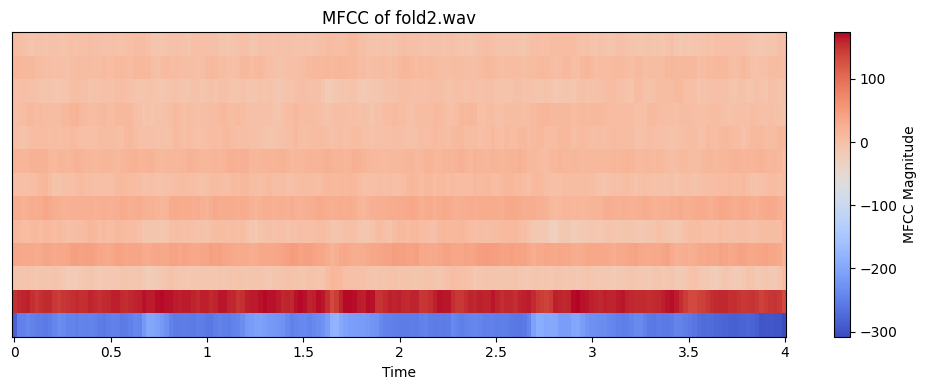

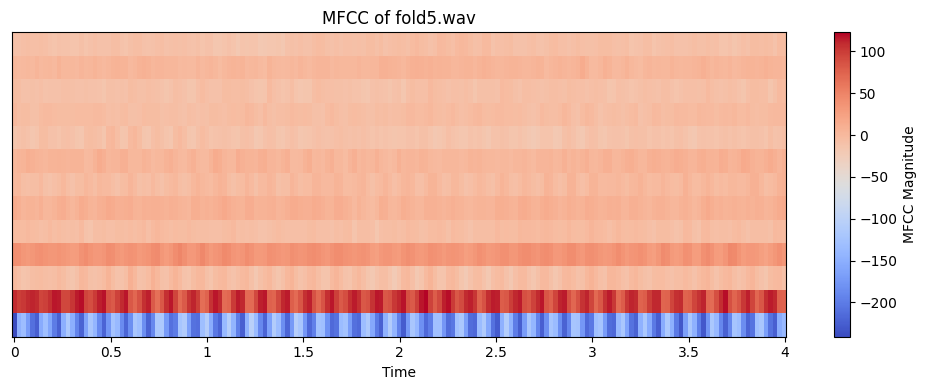

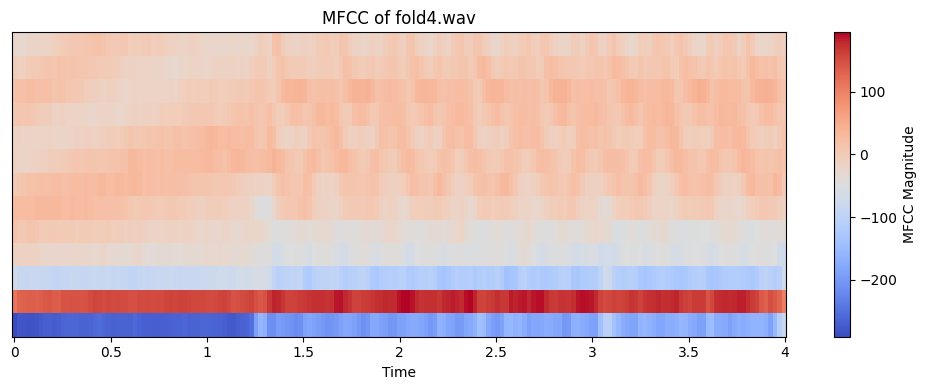

In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import glob

# Get all .wav files and select the first 5
files = glob.glob("fold*.wav")[:5]

# Plot the MFCC for each file
for audio_file in files:
    # Load the audio file
    data, sr = librosa.load(audio_file)

    # Calculate the MFCC
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)  # 13 is the typical number of MFCCs

    # Plot the MFCC
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar(label='MFCC Magnitude')
    plt.title(f'MFCC of {audio_file}')
    plt.tight_layout()
    plt.show()


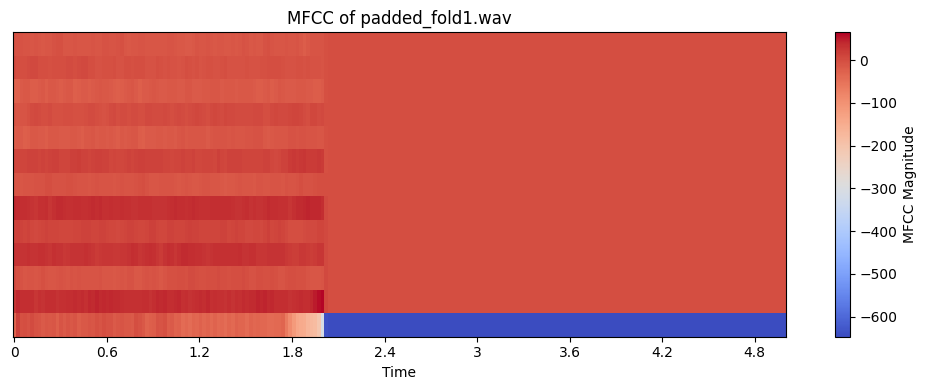

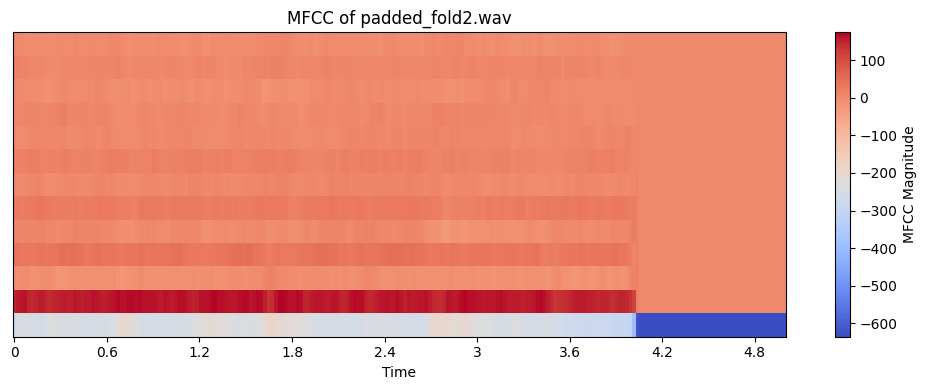

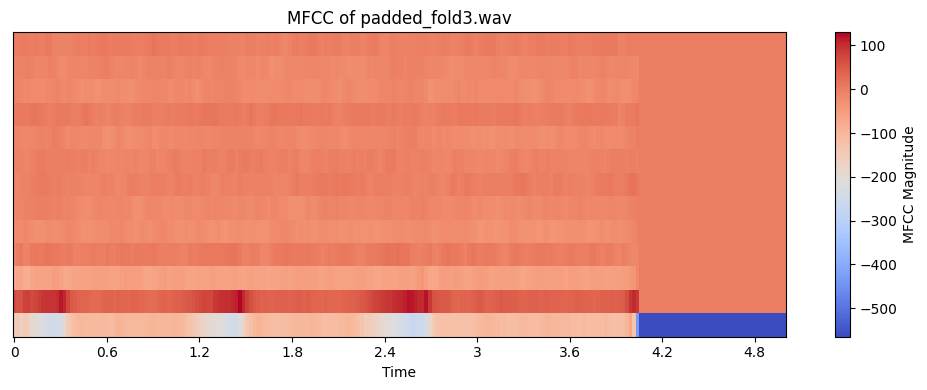

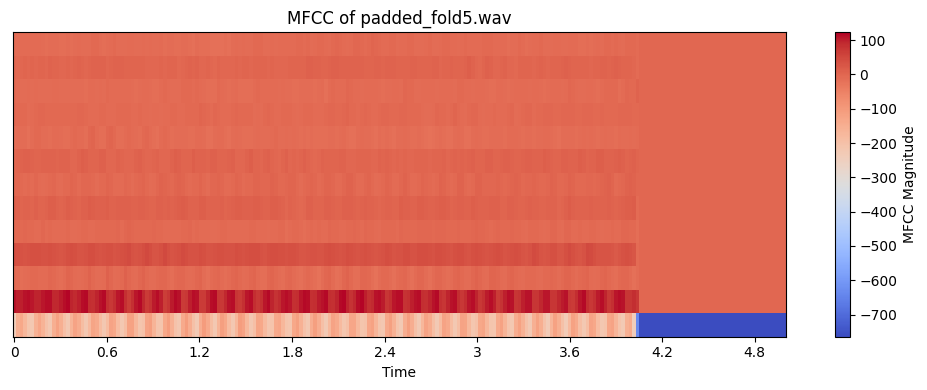

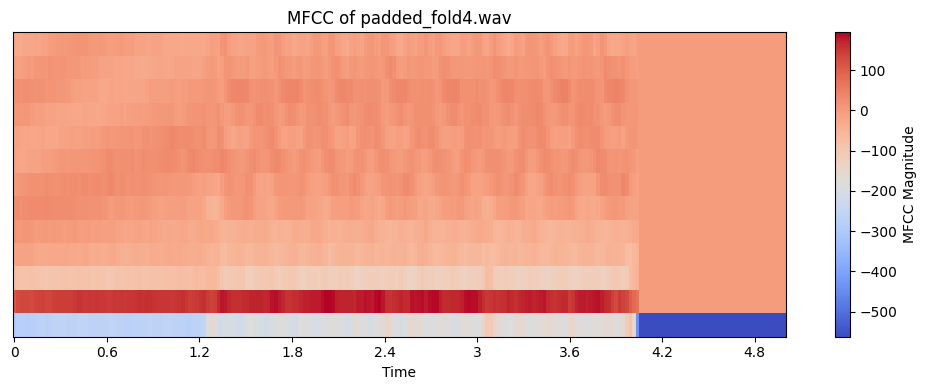

In [30]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import glob

# Get all .wav files and select the first 5
files = glob.glob("padded*.wav")[:5]

# Plot the MFCC for each file
for audio_file in files:
    # Load the audio file
    data, sr = librosa.load(audio_file)

    # Calculate the MFCC
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)  # 13 is the typical number of MFCCs

    # Plot the MFCC
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar(label='MFCC Magnitude')
    plt.title(f'MFCC of {audio_file}')
    plt.tight_layout()
    plt.show()
